In [1]:
#IMPORTAR PACKAGES y LIBRARYS

#Librerías útiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from dateutil.relativedelta import relativedelta
from tqdm.notebook import tqdm
from pmdarima.utils import diff_inv
from datetime import datetime, timedelta
import itertools
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

#otros
import warnings
warnings.filterwarnings("ignore")

#Modelos de Pruebas Estadísticas


import statsmodels.tsa.stattools as ts

#Modelos predictivos estadísticos
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric


#Configuraciones
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#DICCIONARIOS, OBJETOS
dic_mes = {
        'Enero': 1,
        'Febrero': 2,
        'Marzo': 3,
        'Abril':4,
         'Mayo':5,
         'Junio':6,
         'Julio':7,   
         'Agosto':8,
         'Setiembre':9,
         'Octubre':10,
         'Noviembre':11,
         'Diciembre':12
        }


In [3]:
#PREPARACIÓN_DATA

df= pd.read_excel("C:/Users/Usuario/OneDrive - prediqtdata.com/Desktop/Renato/Python/script atenea/consolidado_moderno.xlsx"
,sheet_name="Detergentes")
df.replace(dic_mes, inplace=True)
df['Quarter'] = df['MES'].apply(lambda x: 'Quarter1' if x in [1, 2, 3] else 'Quarter2' if x in [4, 5, 6] else 'Quarter3' if x in [7, 8, 9] else 'Quarter4')
df['Month_in_Quarter'] = df['MES'].apply(lambda x: 1 if x % 3 == 1 else 2 if x % 3 == 2 else 3)
df["PERIODO"]= df["AÑO"].astype(str)+"-"+df["MES"].astype(str)

df['PERIODO'] = pd.to_datetime(df['PERIODO'])
#df['PERIODO'] = df['PERIODO'].dt.to_period('M')
df = df.set_index('PERIODO')



cols=['AÑO','MES','Quarter','Month_in_Quarter','OFICINA DE VENTAS'
      ,'VENTA SELL IN', 'VENTA SELL OUT TOTAL'
      , 'SHARE VOLUMEN ALICORP', 'SHARE VOLUMEN MERCADO'
      ,'SHARE % ALICORP','SHARE % MERCADO']

cols_data =['VENTA SELL IN'
      , 'VENTA SELL OUT TOTAL'
      #, 'SHARE VOLUMEN ALICORP'
      #,'SHARE VOLUMEN MERCADO'
      #,'SHARE % ALICORP'
      #,'SHARE % MERCADO'
      ]


df=df[cols_data]


IsolationForest(contamination=0.06)

,VENTA SELL IN,VENTA SELL OUT TOTAL,anomaly
PERIODO,,,
2020-04-01,1387.000000,1585.000000,-1
2020-05-01,1652.000000,1507.000000,-1
2021-01-01,3391.273604,3104.249883,-1
2021-02-01,1186.397548,2115.519698,-1


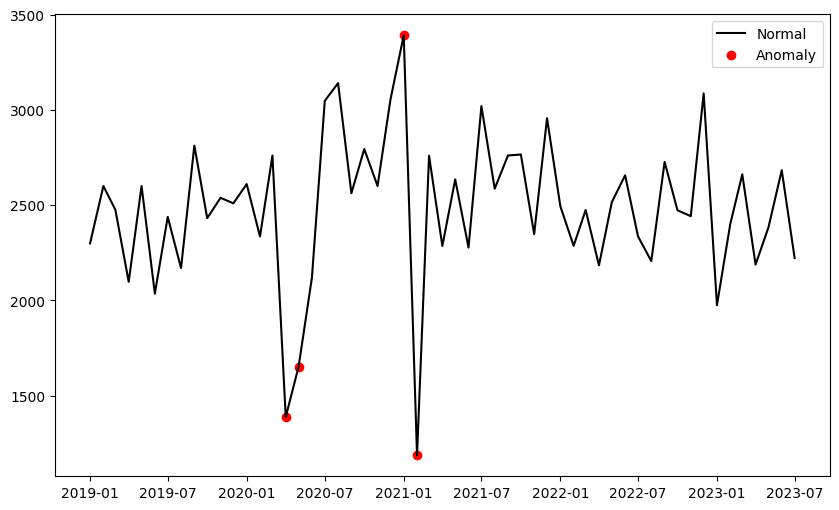

,VENTA SELL IN,VENTA SELL OUT TOTAL,anomaly
PERIODO,,,
2019-01-01,2299.000000,1801.000000,1
2019-02-01,2600.000000,1615.000000,1
2019-03-01,2475.000000,1882.000000,1
2019-04-01,2097.000000,1624.000000,1
2019-05-01,2600.000000,1710.000000,1
2019-06-01,2035.000000,1971.000000,1
2019-07-01,2438.000000,2007.000000,1
2019-08-01,2169.000000,2140.000000,1
2019-09-01,2812.000000,2060.000000,1


In [4]:
outliers_fraction = float(.06)
  
model =  IsolationForest(contamination=outliers_fraction)
model.fit(df)

df['anomaly'] = model.predict(df)
df_anomaly= df[df["anomaly"]==-1]
df_anomaly

# visualization
fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[df['anomaly'] == -1, ['VENTA SELL IN']] #anomaly
ax.plot(df.index, df['VENTA SELL IN'], color='black', label = 'Normal')
ax.scatter(a.index,a['VENTA SELL IN'], color='red', label = 'Anomaly')
plt.legend()
plt.show()
df

In [5]:
df['VENTA SELL IN'] = df.apply(lambda rows: np.NaN if rows["anomaly"] == -1 else rows["VENTA SELL IN"], axis = 1)
window_size = 3
df['VENTA SELL IN']=df['VENTA SELL IN'].fillna(df['VENTA SELL IN'].rolling(window_size+1, min_periods=1).mean())
df

,VENTA SELL IN,VENTA SELL OUT TOTAL,anomaly
PERIODO,,,
2019-01-01,2299.000000,1801.000000,1
2019-02-01,2600.000000,1615.000000,1
2019-03-01,2475.000000,1882.000000,1
2019-04-01,2097.000000,1624.000000,1
2019-05-01,2600.000000,1710.000000,1
2019-06-01,2035.000000,1971.000000,1
2019-07-01,2438.000000,2007.000000,1
2019-08-01,2169.000000,2140.000000,1
2019-09-01,2812.000000,2060.000000,1
